# Assignment 3
### Due 9/21. Do four of five.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1

- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [3]:
df = pd.read_csv('data/nhanes_data_17_18.csv')
df_meta = pd.read_csv('data/nhanes_meta_17_18.csv')
print(df.shape)
df.head()

(8366, 198)


/var/folders/zb/h91tjjld33j5nbqghqy9_xsm0000gn/T/ipykernel_10404/1477585390.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, I took a look at the questions in the meta data so I could understand more about the variables. These were the ones that I thought could be fun to analyze.

- How often do you feel nervous or anxious (52)
- {Do you/Does SP} now smoke cigarettes? (186)
- In general, how healthy is {your/his/her} overall diet?  Would you say. (13)

- Total number of people in household (145)
- Total number of people in the Family (146)
- Total family income (reported as a range value in dollars) (151)
- Number of hours asleep (59)
- Standing Height (cm) (101)
- How much time {do you/does SP} usually spend sitting on a typical day? (111)
- Weight (kg) (99)

In [4]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 200)
df_meta.loc[:, 'EnglishText'];

I honed in on 3 categorical variables I might want to look into: Anxiety scale, Healthy diet, Do you take anxiety meds?

In [5]:
df_meta.iloc[52]

VariableNameLong                                                                                                     HowOftenDoYouFeelWorriedOrAnxious
Variable                                                                                                                                        DLQ100
Type                                                                                                                                           Numeric
Format                                                                                                                                             NaN
Informat                                                                                                                                           NaN
Label                                                                                                         How often do you feel worried or anxious
Source                                                                                        

In [6]:
df_meta.iloc[53]

VariableNameLong                                       TakeMedicationForTheseFeelings
Variable                                                                       DLQ110
Type                                                                          Numeric
Format                                                                            NaN
Informat                                                                          NaN
Label                                             Take medication for these feelings?
Source                                                                            DLQ
VariableName                                                                   DLQ110
SASLabel                                          Take medication for these feelings?
EnglishText                                Do you take medication for these feelings?
Target                           Both males and females 18 YEARS -\n\n\t\t\t150 YEARS
VariableNameLong_variable_df                          

In [7]:
df_meta.iloc[13]

VariableNameLong                                                                                                                                      HowHealthyIsTheDiet
Variable                                                                                                                                                           DBQ700
Type                                                                                                                                                              Numeric
Format                                                                                                                                                                NaN
Informat                                                                                                                                                              NaN
Label                                                                                                                                             How 

I investigated the distribution of responses and the NA values.

Approximately 65% of respondents answered the question: How often do you feel worried or anxious? 

In [8]:
df['HowOftenDoYouFeelWorriedOrAnxious'].value_counts()

HowOftenDoYouFeelWorriedOrAnxious
1.0    1846
0.0    1357
4.0     820
3.0     773
2.0     645
Name: count, dtype: int64

In [9]:
df['AnxiousNA'] = df['HowOftenDoYouFeelWorriedOrAnxious'].isna()
df['AnxiousNA'].value_counts()

AnxiousNA
False    5441
True     2925
Name: count, dtype: int64

Approximately 70% of respondents answered the question: How healthy is your diet?

In [10]:
df['HealthyDietNA'] = df['HowHealthyIsTheDiet'].isna()
df['HealthyDietNA'].value_counts()

HealthyDietNA
False    5826
True     2540
Name: count, dtype: int64

In [11]:
df['HowHealthyIsTheDiet'].value_counts()

HowHealthyIsTheDiet
Good         2283
Fair         1552
Very good    1157
Excellent     439
Poor          395
Name: count, dtype: int64

I wanted to check to make sure I understood the anxiety scale recoding. The question gives respondents the options of: Never, A few times a year, Monthly, Weekly, Daily, but codes the responses range 0-4. I crosstabbed the response with the responses from the question that follows it: Do you take medication for these feelings? See below for results. This makes me confident that it maps 0-4 from least common (Never) to most common (Daily).

In [12]:
pd.crosstab(df['TakeMedicationForTheseFeelings'], df['HowOftenDoYouFeelWorriedOrAnxious'])

HowOftenDoYouFeelWorriedOrAnxious,0.0,1.0,2.0,3.0,4.0
TakeMedicationForTheseFeelings,,,,,
0.0,1348,1726,566,639,535
1.0,9,118,78,133,284


It appears that a greater proportion of people with poor diets are more frequently anxious than those with better diets. The table should not be confused for causation, however, since there may be hidden causal variables such as wealth, leisure time, and education that influence level of anxiety.

In [13]:
# Crosstab raw numbers
ct = pd.crosstab(df['HowOftenDoYouFeelWorriedOrAnxious'], df['HowHealthyIsTheDiet'])
order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
ct[order]

HowHealthyIsTheDiet,Poor,Fair,Good,Very good,Excellent
HowOftenDoYouFeelWorriedOrAnxious,,,,,
0.0,55,294,497,345,166
1.0,90,472,797,365,121
2.0,51,178,248,132,36
3.0,59,235,300,143,36
4.0,112,271,283,112,42


In [14]:
# Cross tab with percentages
ct = pd.crosstab(df['HowOftenDoYouFeelWorriedOrAnxious'], df['HowHealthyIsTheDiet'], normalize=True)
ct = ct[order] * 100
ct = ct.round(2)
ct

HowHealthyIsTheDiet,Poor,Fair,Good,Very good,Excellent
HowOftenDoYouFeelWorriedOrAnxious,,,,,
0.0,1.01,5.40,9.14,6.34,3.05
1.0,1.65,8.68,14.65,6.71,2.22
2.0,0.94,3.27,4.56,2.43,0.66
3.0,1.08,4.32,5.51,2.63,0.66
4.0,2.06,4.98,5.20,2.06,0.77


## 2

- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

I want to look in to smoking cigarettes (categorical) and standing height (numeric).

In [15]:
df_meta.iloc[186]

VariableNameLong                                              DoYouNowSmokeCigarettes
Variable                                                                       SMQ040
Type                                                                          Numeric
Format                                                                            NaN
Informat                                                                          NaN
Label                                                    Do you now smoke cigarettes?
Source                                                                            SMQ
VariableName                                                                   SMQ040
SASLabel                                                 Do you now smoke cigarettes?
EnglishText                                    {Do you/Does SP} now smoke cigarettes?
Target                           Both males and females 18 YEARS -\n\n\t\t\t150 YEARS
VariableNameLong_variable_df                          

In [16]:
df_meta.iloc[101]

VariableNameLong                                                    StandingHeightCm
Variable                                                                       BMXHT
Type                                                                         Numeric
Format                                                                           NaN
Informat                                                                         NaN
Label                                                           Standing Height (cm)
Source                                                                           BMX
VariableName                                                                   BMXHT
SASLabel                                                        Standing Height (cm)
EnglishText                                                     Standing Height (cm)
Target                           Both males and females 2 YEARS -\n\n\t\t\t150 YEARS
VariableNameLong_variable_df                                     

73.3% of respondents have NaN values for the question "Do you now smoke cigarettes?".
That is a much higher proportion of missing values than any other question I have seen so far!

In [17]:
df['SmokingNA'] = df['DoYouNowSmokeCigarettes'].isna()
df['SmokingNA'].value_counts()

SmokingNA
True     6134
False    2232
Name: count, dtype: int64

Only 4.2% of respondents have missing values for the question about their height.

In [18]:
df['StandingHeightCmNA'] = df['StandingHeightCm'].isna()
df['StandingHeightCmNA'].value_counts()

StandingHeightCmNA
False    8016
True      350
Name: count, dtype: int64

I started to investigate with a table of mean height by cigarette usage frequency. Next I plotted the KDEs and ECDFs of height by cigarette frequency.
As expected, the frequency of smoking does not appear related to the height.

In [19]:
df.loc[:, ['DoYouNowSmokeCigarettes', 'StandingHeightCm']].groupby('DoYouNowSmokeCigarettes').mean()

,StandingHeightCm
DoYouNowSmokeCigarettes,
Every day,169.319973
Not at all,168.283871
Some days,169.758049


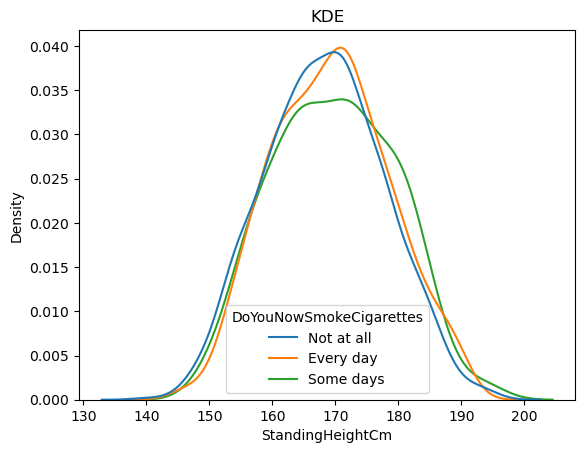

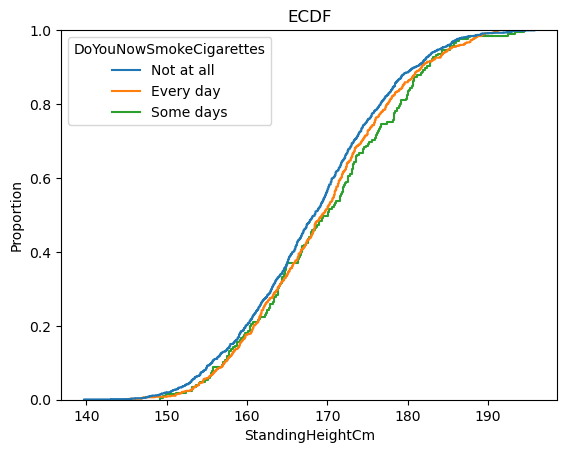

StandingHeightCm                               \
                                   count        mean       std    min   
DoYouNowSmokeCigarettes                                                 
Every day                          751.0  169.319973  9.310010  144.8   
Not at all                        1240.0  168.283871  9.432955  139.7   
Some days                          205.0  169.758049  9.648504  149.2   

                                                        
                             25%    50%     75%    max  
DoYouNowSmokeCigarettes                                 
Every day                162.100  169.3  175.85  191.3  
Not at all               161.475  168.4  174.80  195.8  
Some days                162.800  170.1  177.40  194.5

In [20]:
conditioner = 'DoYouNowSmokeCigarettes'
sns.kdeplot(data=df, x='StandingHeightCm', hue=conditioner, common_norm=False).set(title='KDE')
plt.show()
sns.ecdfplot(data=df, x='StandingHeightCm', hue=conditioner).set(title='ECDF')
plt.show()
df.loc[:,['StandingHeightCm', conditioner]].groupby(conditioner).describe()

Just out of curiosity I wanted to make a plot out of the family income versus anxiety. The plot is fascinating! The highest anxiety people appear to have a family income of $20-30K. Anxiety levels then fall, but there is another bump as income level approaches $100K. One theory is that maybe the second bump reflects the types of jobs that people in that income cluster have (doctor, lawyer, etc) that are more stress provoking.

It is notable that you can't ascertain the trend from the ECDF plot below - the KDE exposes the double bump much better.

[Text(0.5, 1.0, 'KDE')]

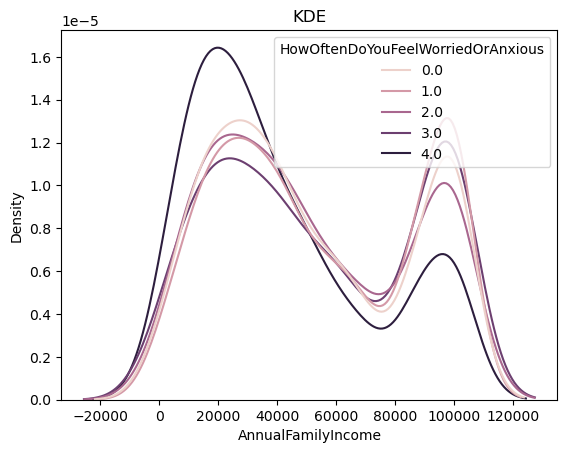

In [21]:
conditioner = 'HowOftenDoYouFeelWorriedOrAnxious'
sns.kdeplot(data=df, x='AnnualFamilyIncome', hue=conditioner, common_norm=False).set(title='KDE')

[Text(0.5, 1.0, 'ECDF')]

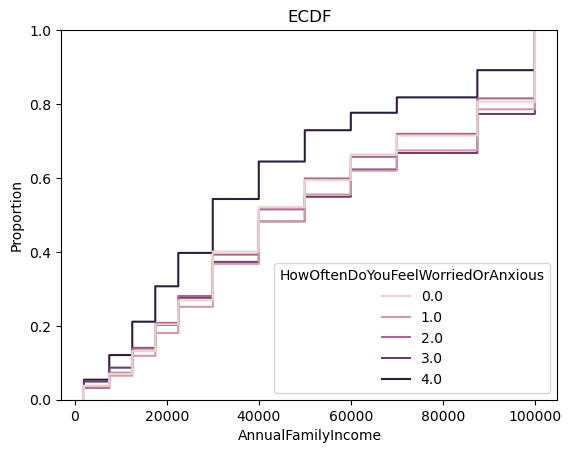

In [22]:
sns.ecdfplot(data=df, x='AnnualFamilyIncome', hue=conditioner).set(title='ECDF')

Looking at the ECDF, I got concerned that the family income had very low N because of the steps.  

So, I checked out the contingency table. It appears that Annual income has a limited number of options, rather than being a continuous variable. The lumping has analytical implications that I won't go into. 

In [23]:
pd.crosstab(df['AnnualFamilyIncome'], df['HowOftenDoYouFeelWorriedOrAnxious'])

HowOftenDoYouFeelWorriedOrAnxious,0.0,1.0,2.0,3.0,4.0
AnnualFamilyIncome,,,,,
2000.0,44,57,18,34,39
7500.0,38,46,23,26,48
12500.0,71,85,37,37,65
17500.0,84,98,39,43,69
22500.0,76,112,41,51,65
30000.0,153,184,63,67,105
40000.0,140,183,69,76,73
50000.0,85,114,47,46,61
60000.0,81,102,33,51,34


## 3

We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

To minimize, take the derivative and set to 0:

$$
\partial MSE(\hat{y}(z)) = -2 * \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0
$$

Drop the -2 constant and separate the sum terms:

$$
0 = \dfrac{1}{N} \sum_{i=1}^N y_i * \frac{1}{h}k\left(\frac{z-x_i}{h}\right) - \dfrac{1}{N} \sum_{i=1}^N \hat{y}(z) * \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$

Move to the other side of the equation and pull out $\hat{y}(z)$ since it does not vary by $i$:

$$
\hat{y}(z) * \dfrac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = \dfrac{1}{N} \sum_{i=1}^N y_i * \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$

Divide by $ \dfrac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right) $ to get the Naradaya-Watson estimator:

$$
\hat{y}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h} \right)}
$$

## 4

- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

I want to explore the relationship between height and weight. First, I made a scatterplot.

<Axes: xlabel='StandingHeightCm', ylabel='WeightKg'>

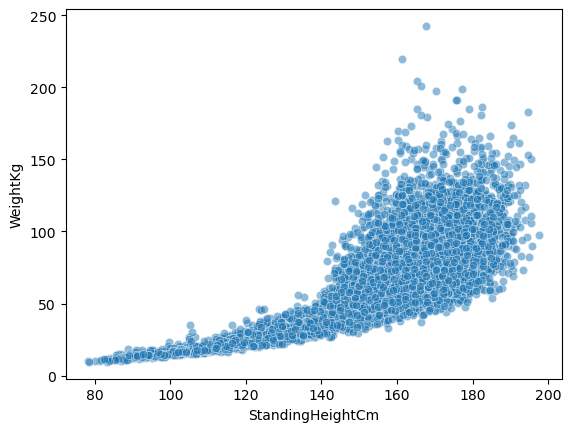

In [24]:
sns.scatterplot(data=df, x=df['StandingHeightCm'], y=df['WeightKg'], alpha=0.5)

In [25]:
print(sum(df['WeightKg'].isna()))
print(sum(df['StandingHeightCm'].isna()))

124
350


In [26]:
df_lcls = df.loc[:,['WeightKg', 'StandingHeightCm']]
df_lcsls = df_lcls.dropna() # Drop rows with missing values; like a mask 
df_lcls = df_lcls.reset_index() # Reset the row index
df_lcls.head()

,index,WeightKg,StandingHeightCm
0,0,13.7,88.6
1,1,13.9,94.2
2,2,79.5,158.3
3,3,66.3,175.7
4,4,45.4,158.4


I used the LCLS estimator with the Silverman bandwidth. I also dropped NaN values from the data, since it otherwise nullifies the matrix multiplication.

In [27]:
x = df['StandingHeightCm']
y = df['WeightKg']

def lcls(x, y):
    
    x = x.to_numpy(dtype=float)
    y = y.to_numpy(dtype=float)

    mask = np.isfinite(x) & np.isfinite(y)

    x = x[mask]
    y = y[mask]

    n = len(x)
    grid = np.sort(np.unique(x))

    # Silverman plug-in for bandwidth
    iqr = np.quantile(x, 0.75) - np.quantile(x, 0.25)
    h = 0.9 * min(np.std(x), iqr / 1.34) * len(x) ** (-0.2)
    print(f'Bandwidth equals: {h}')

    # Calculate kernel bumps
    u = -(x.reshape(-1, 1) - grid.reshape(1, -1)) ** 2
    k = np.exp(u/(2 * h**2))/ np.sqrt(2 * np.pi * h**2)

    # LCLS estimator
    denominator = np.sum(k, axis=0)
    y_hat = (y @ k) /denominator

    return y_hat, grid

y_hat, grid = lcls(x, y)

Bandwidth equals: 2.2035891944034125


The LCLS estimator follows the data quite well.

The data shows that a person's weight increases as height increases (weight measured as the mean within a 4.4cm height bandwidth). The sharper slope in weight from 140cm-145cm (~4'7" to 4'9") may reflect the transition into adolescence associated with faster weight gain.

Another note: The LCLS estimator appears to be slightly lower than the middle of the data in the 150cm to 190cm range. I adjusted the alpha parameter down to 0.3, which shows that the higher weights in this range are less concentrated than the lower weights, hence the line of fit positioned lower than expected with a higher alpha parameter.  

You can also see the line just start to tail off lower at the end of the data as a result of low N and outliers.

<Axes: xlabel='StandingHeightCm', ylabel='WeightKg'>

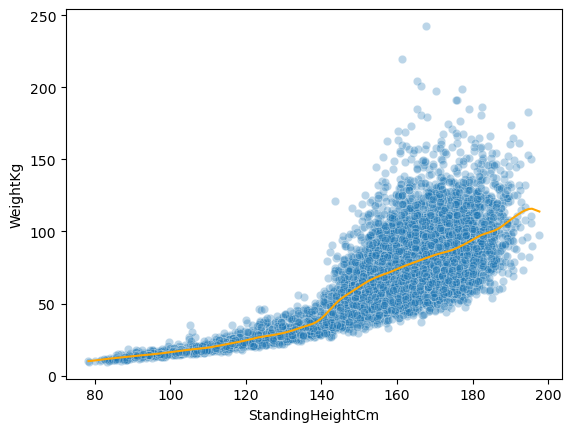

In [28]:
sns.scatterplot(data=df, x='StandingHeightCm', y='WeightKg', alpha=0.3)
sns.lineplot(x=grid, y=y_hat, color='orange')

## 5

- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome